# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

# Reading Data From CSV File

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/4.2/CSE 4238/Assignment 3/Dataset 1.csv',engine = 'python')

data = data.sample(frac = 1, random_state=21).reset_index(drop=True)

print(data['label'].value_counts(0))
data

0    8000
1    2314
Name: label, dtype: int64


,message,label
0,#flylady Time to start the LAST WEEK OF SCHOOL...,0
1,go lucas &amp; justine for the win tonight on ...,0
2,"Missin a certain person,mmh.... memories,thos ...",0
3,@GlastoWatch thanks for that laugh! I do hope ...,0
4,@Corycm HAHAHAHA You really MUST be cool then...,0
...,...,...
10309,@Medscape Higher Rates of Depression in Sexual...,1
10310,Celebrating a minor banking triumph (that's ba...,0
10311,"@lilibthl You , fighting your depression pic....",1
10312,"@emkattt Personally, Red Rock Deli chips are a...",0


# Spliting Data

In [ ]:
split = int(0.2 *data.shape[0])

test = data.iloc[-split:]
valid = data.iloc[ -2 * split : -split]
train = data.iloc[: -2 * split]

print(train['label'].value_counts())
# train

print(valid['label'].value_counts())
# validX

print(test['label'].value_counts())
# test

0    4833
1    1357
Name: label, dtype: int64
0    1587
1     475
Name: label, dtype: int64
0    1580
1     482
Name: label, dtype: int64


# Converting all data to Numpy Array

In [ ]:
trainX = np.array(train.iloc[:, 0])
trainY = np.array(train.iloc[:, 1])

print(trainX.shape)
print(trainY.shape)
# print(trainX)
# print(trainY)

validX = np.array(valid.iloc[:,0])
validY = np.array(valid.iloc[:,1])

print(validX.shape)
print(validY.shape)
# print(validX)
# print(validY)

testX = np.array(test.iloc[:,0])
testY = np.array(test.iloc[:,1])

print(testX.shape)
print(testY.shape)
# print(testX)
# print(testY)

(6190,)
(6190,)
(2062,)
(2062,)
(2062,)
(2062,)


# Stemming

In [ ]:
# import nltk
# import re

# stemmer= nltk.stem.PorterStemmer()
# X = []
# for sentence in trainX:
#     # Remove mentions (@username), all URLs, all hashtags.  (\S+ matches with everything that is not a whitespace)
#     sentence = re.sub("@\S+|http\S+|#\S+", "", str(sentence))
#     #stemming
#     temp = [stemmer.stem(word) for word in sentence]
#     X.append(temp)

# trainX = X

# Tokenizing and Converting to Sequences

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= 10000, filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

tokenizer.fit_on_texts(trainX)

train_seqs = tokenizer.texts_to_sequences(trainX)
valid_seqs = tokenizer.texts_to_sequences(validX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs)
valid_seqs = tf.keras.preprocessing.sequence.pad_sequences(valid_seqs)
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs)

print(train_seqs.shape)
print(valid_seqs.shape)
print(test_seqs.shape)

(6190, 84)
(2062, 57)
(2062, 67)


# Adding layers to the Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1028160   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         657408    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         656384    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 16)                16960     
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 2,358,929
Trainable params: 2,358,929
Non-trainable params: 0
_________________________________________________________________


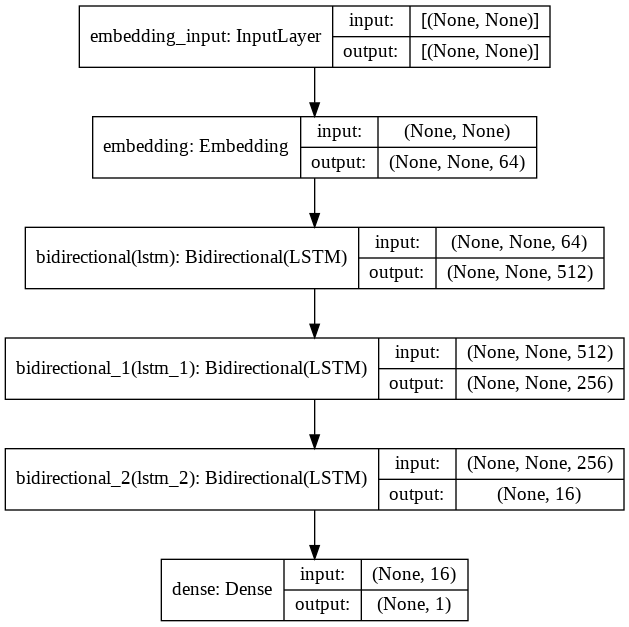

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 64))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences = True, dropout = 0.3)))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences = True, dropout = 0.3)))
model.add(layers.Bidirectional(layers.LSTM(8, dropout = 0.3)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

# Train

In [ ]:
History = model.fit(train_seqs, trainY, epochs = 5, validation_data = (valid_seqs, validY), verbose = 'auto')

Epoch 1/5
194/194 [==============================] - 49s 198ms/step - loss: 0.2219 - accuracy: 0.9195 - val_loss: 0.0667 - val_accuracy: 0.9859
Epoch 2/5
194/194 [==============================] - 36s 185ms/step - loss: 0.0254 - accuracy: 0.9947 - val_loss: 0.0344 - val_accuracy: 0.9927
Epoch 3/5
194/194 [==============================] - 36s 185ms/step - loss: 0.0081 - accuracy: 0.9990 - val_loss: 0.0419 - val_accuracy: 0.9903
Epoch 4/5
194/194 [==============================] - 36s 184ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0387 - val_accuracy: 0.9927
Epoch 5/5
194/194 [==============================] - 36s 185ms/step - loss: 0.0059 - accuracy: 0.9994 - val_loss: 0.0466 - val_accuracy: 0.9918


# Plotting the accuracy and loss graph

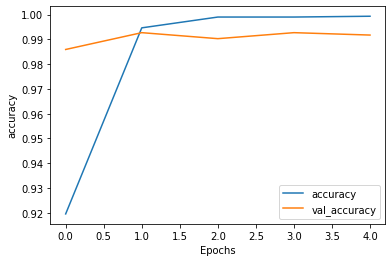

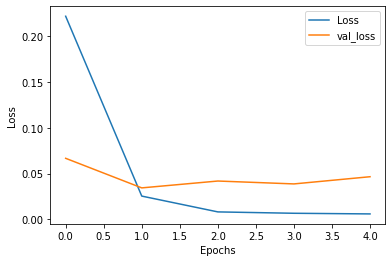

In [ ]:
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "val_loss"])
plt.show()

# Importing Libraries to measure performance Scores

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Trainng Performance score

194/194 [==============================] - 16s 72ms/step - loss: 0.0059 - accuracy: 0.9992
Train Loss: 0.005908950697630644
Train Accuracy: 0.9991922378540039 (Model Metric)
Train Accuracy: 0.9991922455573505 (sklearn Metric)
Train Precision: 0.9992614475627769
Train Recall: 0.9970523212969786
Train F1-score: 0.9981556621172998


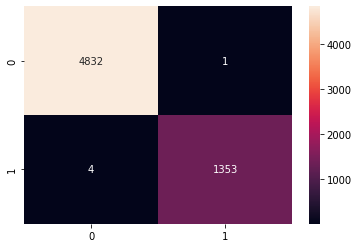

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

# Validation Performance Scores

65/65 [==============================] - 3s 51ms/step - loss: 0.0466 - accuracy: 0.9918
Validation Loss: 0.04656500369310379
Validation Accuracy: 0.9917556047439575 (Model Metric)
Validation Accuracy: 0.9917555771096024 (sklearn Metric)
Validation Precision: 0.9851694915254238
Validation Recall: 0.9789473684210527
Validation F1-score: 0.9820485744456178


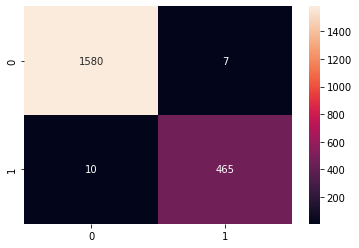

In [ ]:
y_pred = model.predict(valid_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(valid_seqs, validY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(validY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(validY, y_pred))
print('Validation Recall:', recall_score(validY, y_pred))
print('Validation F1-score:', f1_score(validY, y_pred))

sns.heatmap(confusion_matrix(validY, y_pred), annot = True, fmt = 'g')

# Test Performance Scores

65/65 [==============================] - 6s 60ms/step - loss: 0.0396 - accuracy: 0.9922
Test Loss: 0.03962492197751999
Test Accuracy: 0.9922405481338501 (Model Metric)
Test Accuracy: 0.9922405431619786 (sklearn Metric)
Test Precision: 0.981404958677686
Test Recall: 0.9854771784232366
Test F1-score: 0.9834368530020703


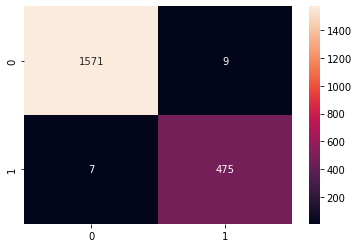

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')